Authors:
Kevin Ding, Jason Liu, Billy Ge

### Install Packages

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

### Read Data
First import the dataset and we take a look at the dataset. There are 10127 rows (instances) and 23 columns (features).

In [193]:
data=pd.read_csv("./BankChurners.csv")
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


### Data Cleaning
We remove clumns that contribute limited information to our segmentation purpose. Moreover, we check for missing and duplicated values. We then one hot encode categorical variables to make it fit in our model.

In [194]:
data=data.drop(["CLIENTNUM",
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [195]:
# check for missing values
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [196]:
# check for duplicated rows
flag=True
for value in data.duplicated():
    if(value):
        flag=value
        break
print(flag)

True


### Data Visualization
We take a look at the distribution of the data and some important features.

First take a look at the comparison of the average utilization ratio of customers with different education levels, separated by gender.

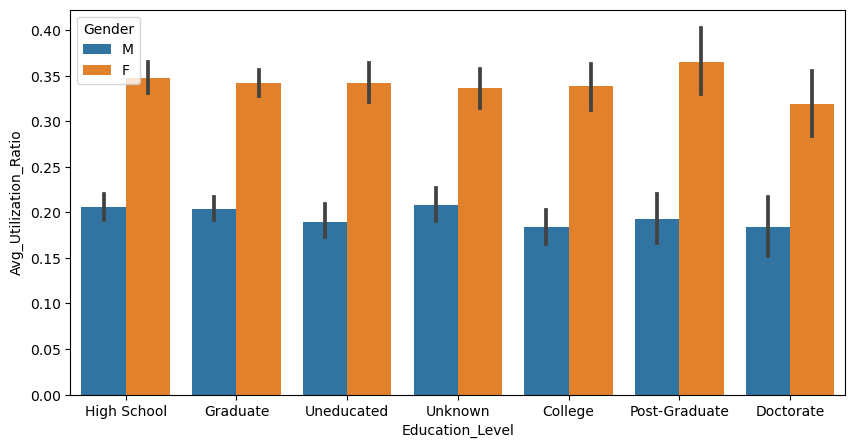

In [245]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x="Education_Level",y="Avg_Utilization_Ratio",hue="Gender")
plt.show()

Also we look at the number of customers in each income category, categorized by whether they are existing customers or not.

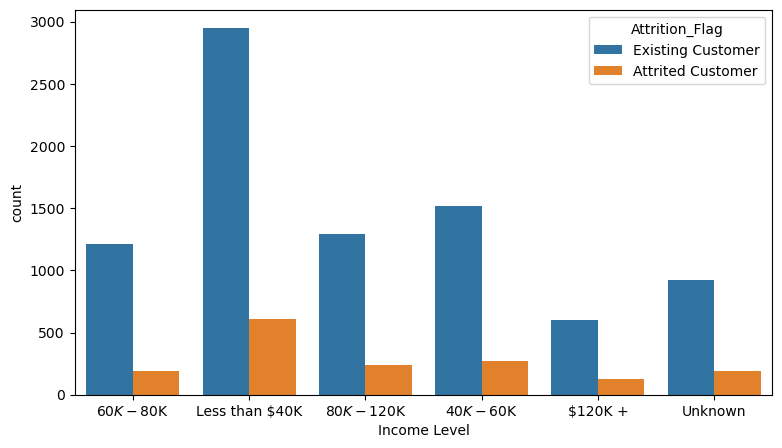

In [198]:
plt.figure(figsize=(9,5))
sns.countplot(data=data,x="Income_Category",hue="Attrition_Flag")
plt.xlabel("Income Level")
plt.show()

We also explore a bit about age distribution, before going forward.

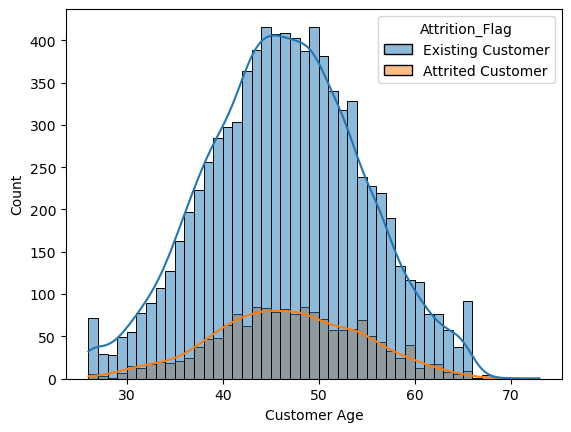

In [199]:
plt.figure()
sns.histplot(data=data,x="Customer_Age",hue="Attrition_Flag",kde=True)
plt.xlabel("Customer Age")
plt.show()

Next, we check the relationship between total transaction amount and credit limit, separated by the attrition flag.

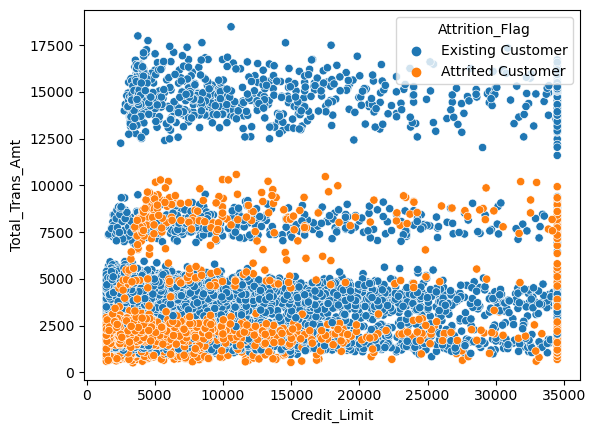

In [200]:
plt.figure()
sns.scatterplot(data=data,x="Credit_Limit",y="Total_Trans_Amt",hue="Attrition_Flag")
plt.show()

### Data Preprocessing and Feature Selection

We first need to encode all of the categorical variables into numerical ones and then form a new dataset ready for feature selection.

In [201]:
categoricals=["Attrition_Flag","Gender","Education_Level","Marital_Status","Income_Category","Card_Category"]
mapping=dict()
encoder=LabelEncoder()
for c in categoricals:
    column=data[c]
    value=encoder.fit_transform(column)
    mapping[c]=value
cat_df=pd.DataFrame(mapping)

In [202]:
numericals=[f for f in data.columns if f not in categoricals]
num_df=data.loc[:,numericals]
df=pd.concat([num_df,cat_df],axis=1)

Now we conduct feature selection. First we do a correlation matrix and then we measure the importance of these features to the attrition feature.

<AxesSubplot: >

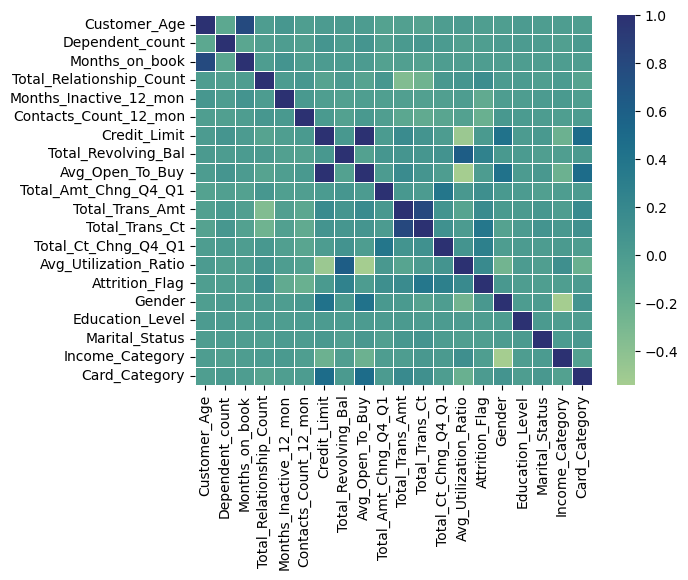

In [203]:
matrix=df.corr()
sns.heatmap(matrix,linewidth=0.5,cmap="crest")

Now measure the importance of features with respect to the attrition feature only, to reduce the data dimension.

In [204]:
xs=df[[f for f in df.columns if f!="Attrition_Flag"]]
ys=df["Attrition_Flag"]
params={
    "max_depth":range(2,11,2),
    "min_samples_split":range(5,31,10),
    "min_samples_leaf":range(5,31,10)
}
fold=StratifiedKFold(n_splits=10,shuffle=True)
estimators=GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,cv=fold)
results=estimators.fit(xs,ys)
results.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}

In [205]:
coeff=pd.Series(results.best_estimator_.feature_importances_,index=xs.columns)
coeff

Customer_Age                0.024392
Dependent_count             0.005929
Months_on_book              0.012775
Total_Relationship_Count    0.073468
Months_Inactive_12_mon      0.020741
Contacts_Count_12_mon       0.022383
Credit_Limit                0.022394
Total_Revolving_Bal         0.124917
Avg_Open_To_Buy             0.020491
Total_Amt_Chng_Q4_Q1        0.051670
Total_Trans_Amt             0.201201
Total_Trans_Ct              0.197651
Total_Ct_Chng_Q4_Q1         0.129032
Avg_Utilization_Ratio       0.071729
Gender                      0.008627
Education_Level             0.003564
Marital_Status              0.003699
Income_Category             0.004877
Card_Category               0.000458
dtype: float64

In [206]:
selected=coeff[coeff>=0.05].index.to_list()
selected

['Total_Relationship_Count',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

Reform the dataset.

In [207]:
selected.append("Attrition_Flag")
s_data=df.loc[:,selected]
s_data

,Total_Relationship_Count,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,5,777,1.335,1144,42,1.625,0.061,1
1,6,864,1.541,1291,33,3.714,0.105,1
2,4,0,2.594,1887,20,2.333,0.000,1
3,3,2517,1.405,1171,20,2.333,0.760,1
4,5,0,2.175,816,28,2.500,0.000,1
...,...,...,...,...,...,...,...,...
10122,3,1851,0.703,15476,117,0.857,0.462,1
10123,4,2186,0.804,8764,69,0.683,0.511,0
10124,5,0,0.819,10291,60,0.818,0.000,0
10125,4,0,0.535,8395,62,0.722,0.000,0


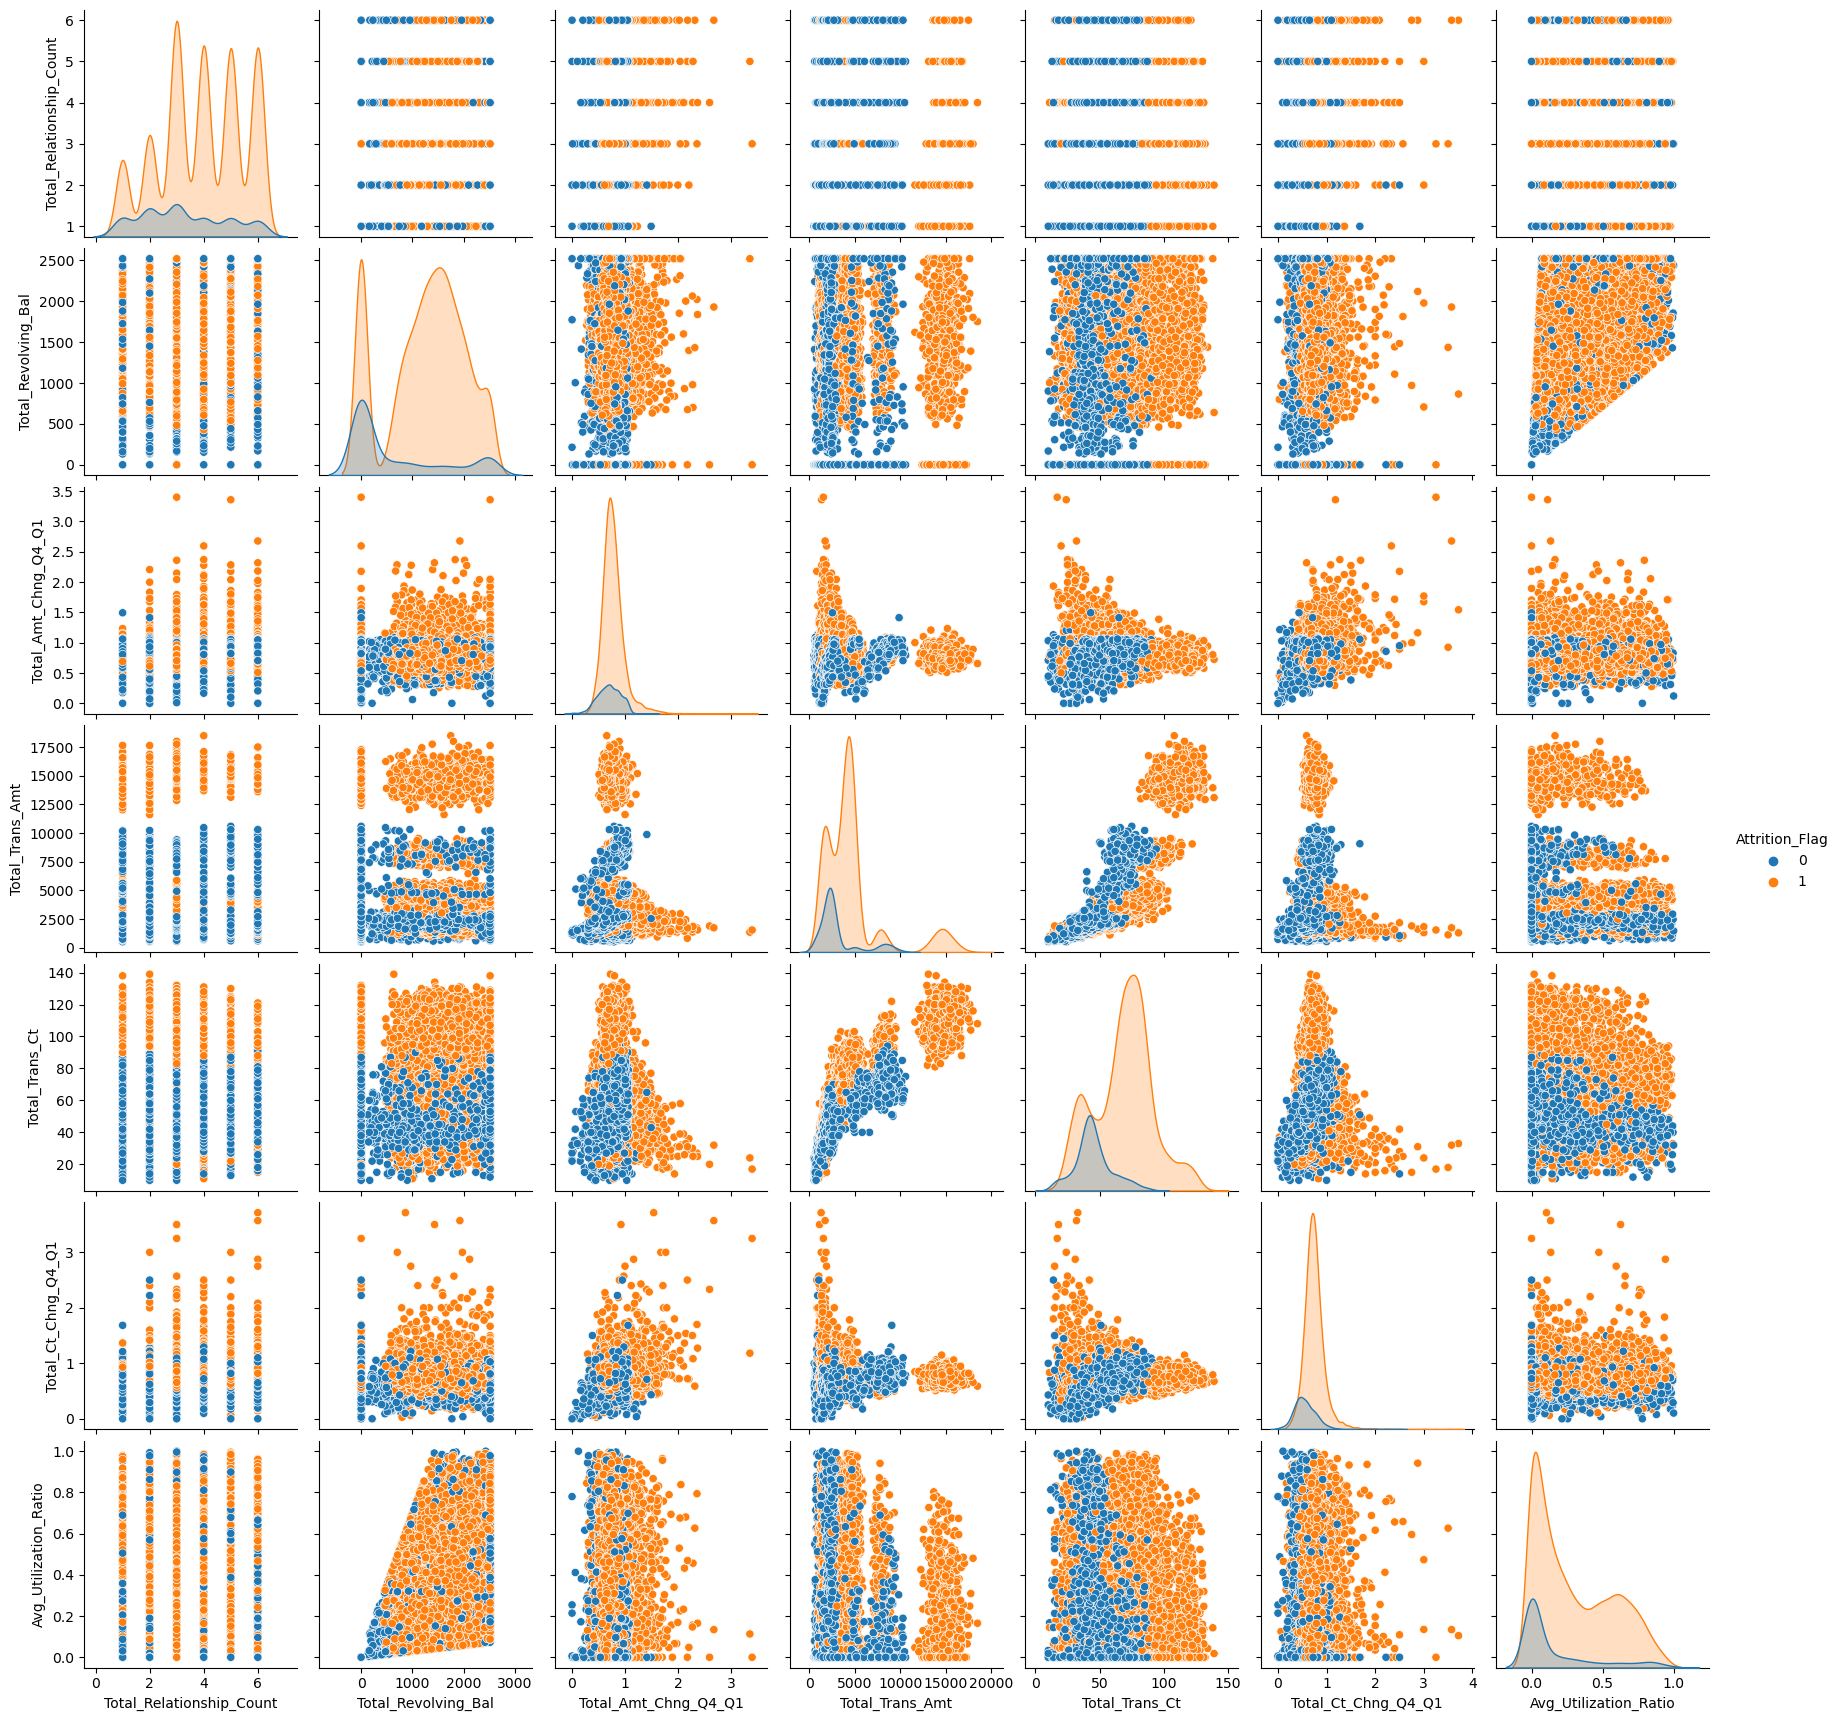

In [208]:
sns.pairplot(data=s_data,hue="Attrition_Flag")

Now we standardize the dataset.

In [209]:
s_scaler=StandardScaler()
s_data_scal=s_scaler.fit_transform(s_data)
d_scaler=StandardScaler()
d_data_scal=d_scaler.fit_transform(df)

### Clustering

#### K-Means

In [210]:
inertias=[]
sils=[]
for k in range(2,16,1):
    model=KMeans(n_clusters=k)
    pred=model.fit_predict(s_data_scal)
    pred=pred.reshape(-1,1)
    inertias.append(model.inertia_)
    sils.append(silhouette_score(s_data_scal,pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Text(0.5, 1.0, 'silhouette scores')

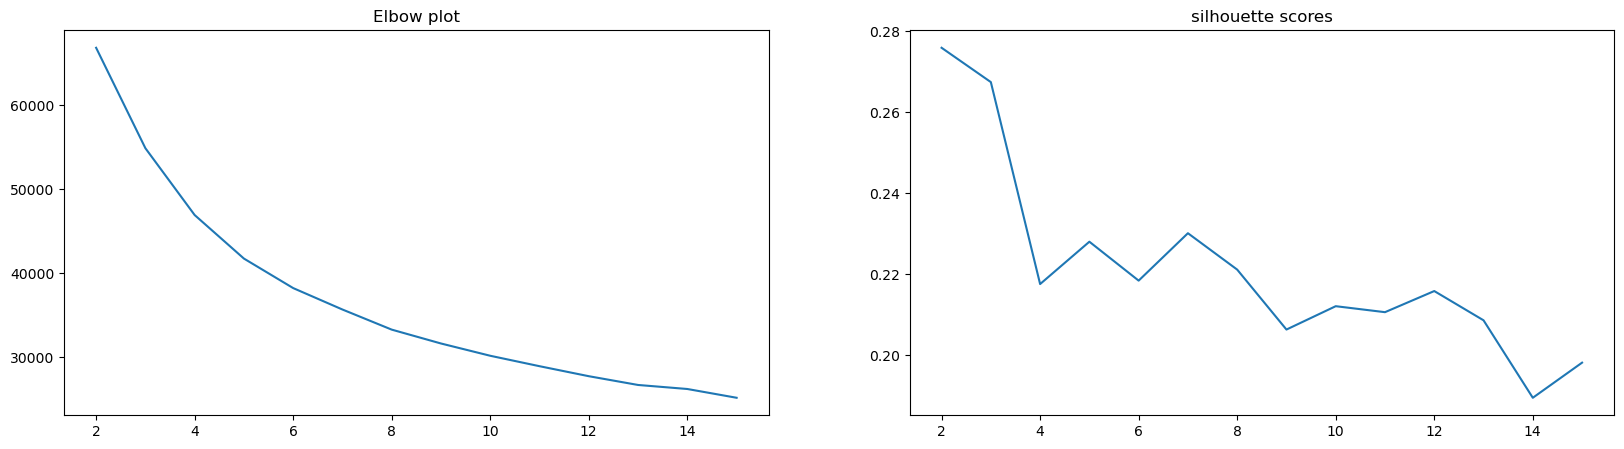

In [211]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.lineplot(x=range(2,16,1),y=inertias,ax=ax[0])
ax[0].set_title("Elbow plot")

sns.lineplot(x=range(2,16,1),y=sils,ax=ax[1])
ax[1].set_title("silhouette scores")

Looks like we have optimal k=6.

In [212]:
kmeans=KMeans(n_clusters=6)
km_pred=kmeans.fit_predict(s_data_scal)
silhouette_score(s_data_scal,km_pred)

0.21852401664617224

In [213]:
kms=pd.DataFrame(s_scaler.inverse_transform(s_data_scal),
                columns=s_data.columns)
kms["clusters"]=km_pred
kms.groupby("clusters").count().iloc[:,1]

clusters
0    1882
1     794
2    1124
3    2338
4    1494
5    2495
Name: Total_Revolving_Bal, dtype: int64

Now to visualize clusters based on different features.

<AxesSubplot: xlabel='clusters', ylabel='Total_Trans_Ct'>

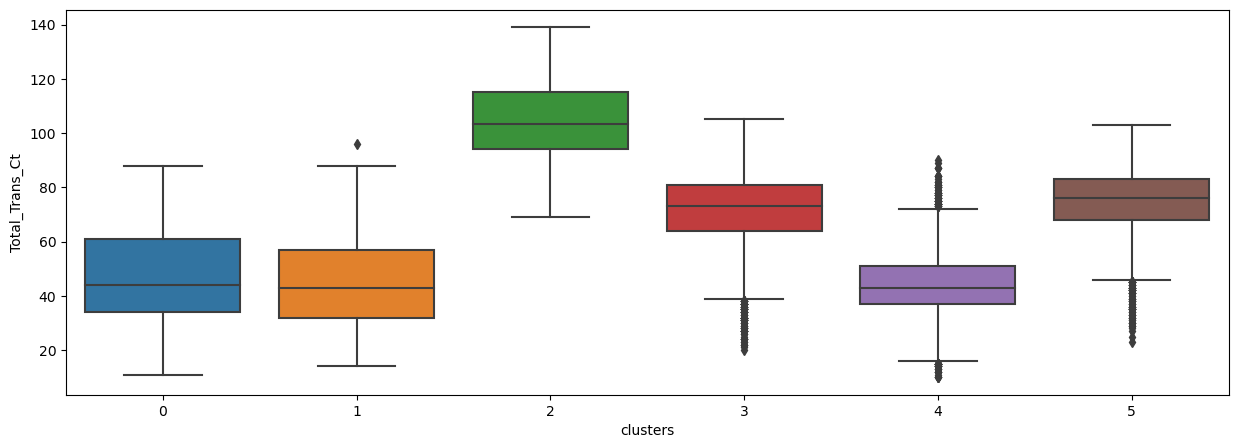

In [214]:
plt.figure(figsize=(15,5))
sns.boxplot(y=kms["Total_Trans_Ct"],x=kms["clusters"])

<AxesSubplot: xlabel='clusters', ylabel='Total_Revolving_Bal'>

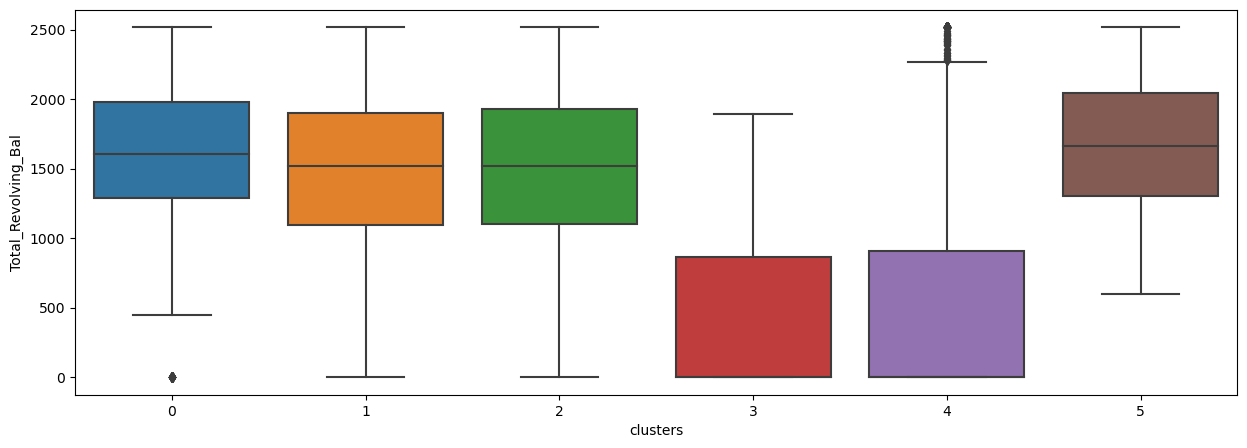

In [215]:
plt.figure(figsize=(15,5))
sns.boxplot(y=kms["Total_Revolving_Bal"],x=kms["clusters"])

<AxesSubplot: xlabel='clusters', ylabel='Avg_Utilization_Ratio'>

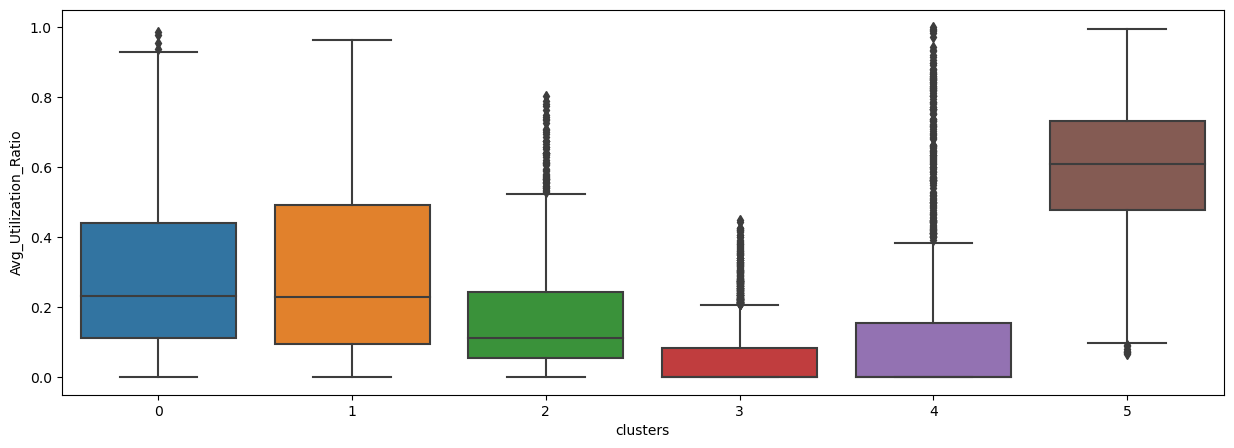

In [216]:
plt.figure(figsize=(15,5))
sns.boxplot(y=kms["Avg_Utilization_Ratio"],x=kms["clusters"])

<AxesSubplot: xlabel='Avg_Utilization_Ratio', ylabel='Total_Trans_Ct'>

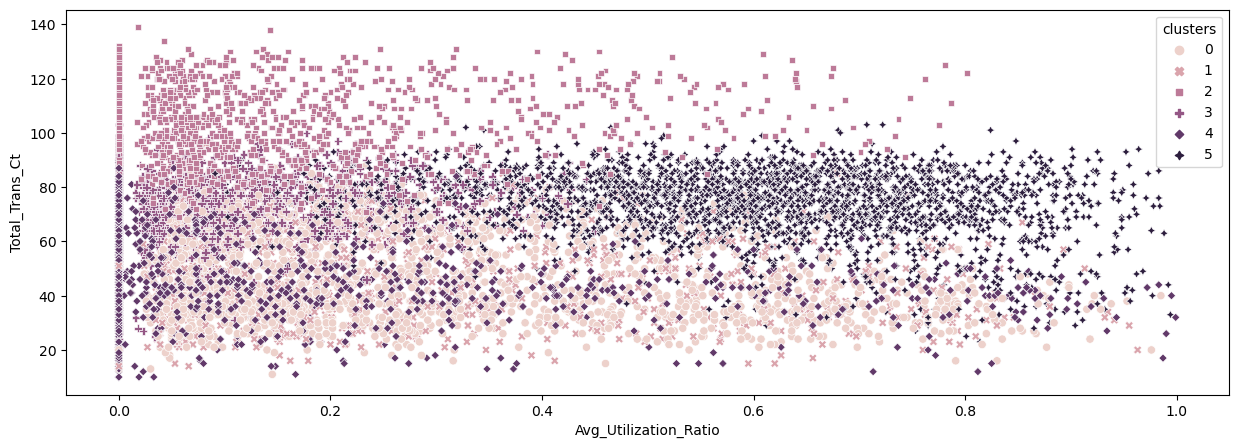

In [247]:
plt.figure(figsize=(15,5))
sns.scatterplot(y=kms["Total_Trans_Ct"],x=kms["Avg_Utilization_Ratio"],style=kms["clusters"],hue=kms["clusters"])

#### DBSCAN

First we find epsilon by finding the distance between each points.

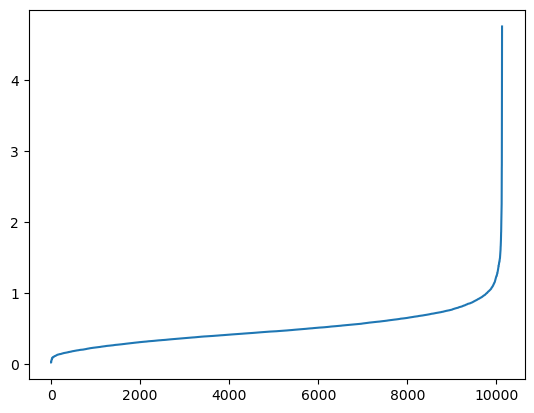

In [218]:
nbs=NearestNeighbors(n_neighbors=5)
nbs_fit=nbs.fit(s_data_scal)
dis,ind=nbs_fit.kneighbors(s_data_scal)
dis=np.sort(dis,axis=0)
dis=dis[:,1]
plt.plot(dis)

Now we determine the best number of neighbors to look at when doing DBSCAN.

<AxesSubplot: >

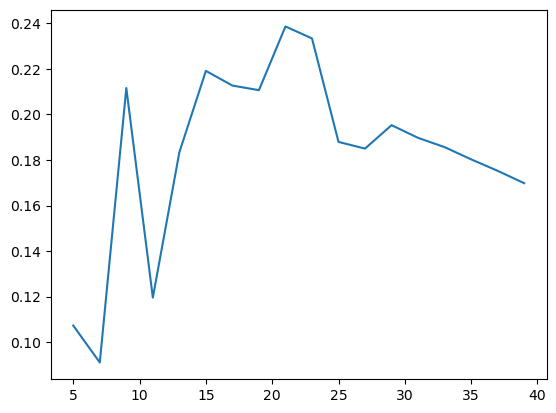

In [241]:
samples=range(5,41,2)
silhs=[]
for s in samples:
    model=DBSCAN(eps=1,min_samples=s)
    pred=model.fit_predict(s_data_scal)
    silhs.append(silhouette_score(s_data_scal,pred))
sns.lineplot(x=samples,y=silhs)

In [242]:
dbscan=DBSCAN(eps=1,min_samples=23)
pred=dbscan.fit_predict(s_data_scal)
dbs=pd.DataFrame(s_scaler.inverse_transform(s_data_scal),
                columns=s_data.columns)
dbs["clusters"]=pred

In [243]:
silhouette_score(s_data_scal,pred)

0.2333577700489074

In [229]:
dbs.groupby("clusters").count().iloc[:,1]

clusters
-1     840
 0    7296
 1    1260
 2       5
 3     726
Name: Total_Revolving_Bal, dtype: int64

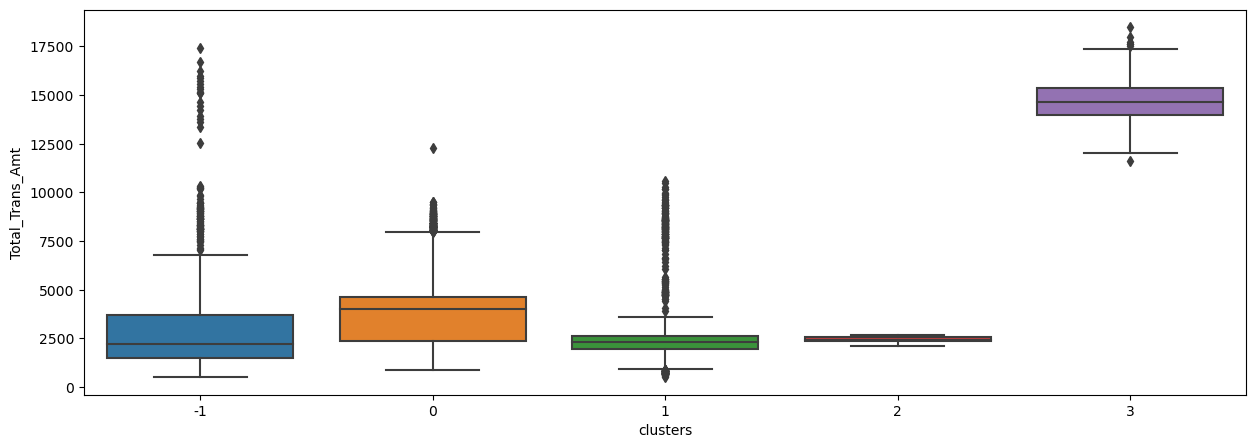

In [234]:
plt.figure(figsize=(15,5))
sns.boxplot(y=dbs["Total_Trans_Amt"], x=dbs["clusters"]);

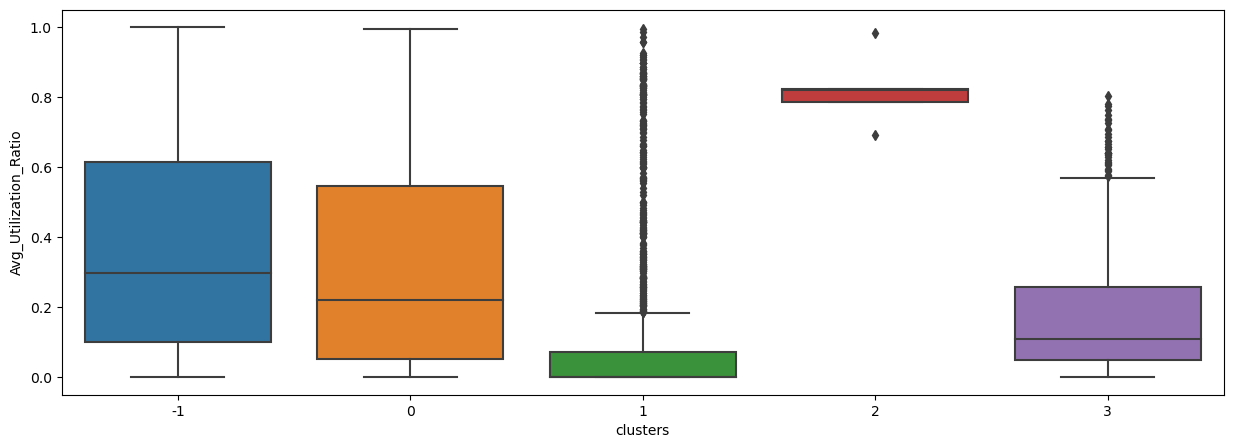

In [233]:
plt.figure(figsize=(15,5))
sns.boxplot(y=dbs["Avg_Utilization_Ratio"], x=dbs["clusters"]);

<AxesSubplot: xlabel='Avg_Utilization_Ratio', ylabel='Total_Trans_Ct'>

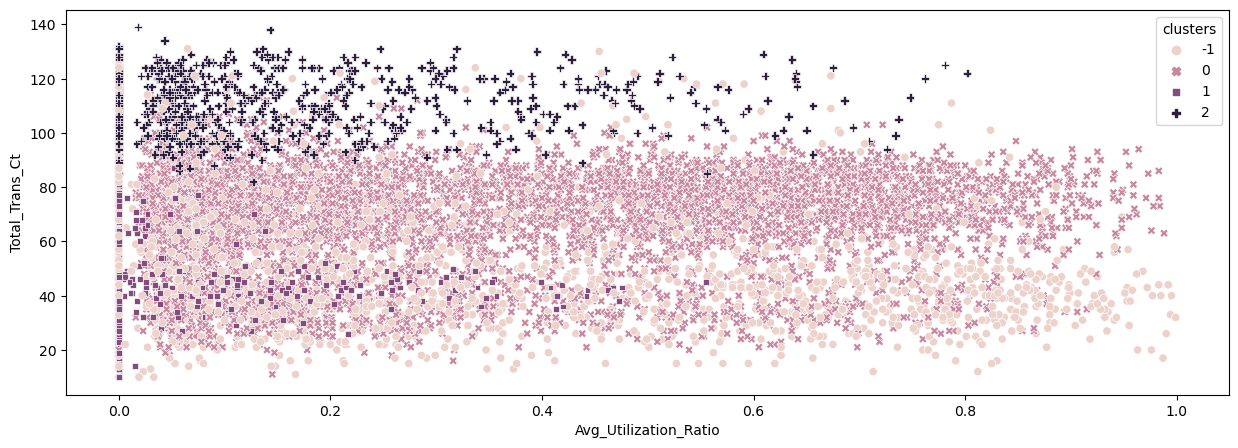

In [246]:
plt.figure(figsize=(15,5))
sns.scatterplot(y=dbs["Total_Trans_Ct"],x=dbs["Avg_Utilization_Ratio"],style=dbs["clusters"],hue=dbs["clusters"])